### Build a machine learning model to estimate percentage of abese population

In [54]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv(r'E:\Data Is Everything\Edyoda\archive (1)\Nutrition__Physical_Activity.csv')

In [71]:
df.sample(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
52286,2016,2016,IL,Illinois,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(40.48501028300046, -88.99771017799969)",PA,PA1,Q047,VALUE,17,Gender,Female,GEN,FEMALE
43871,2015,2015,SC,South Carolina,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,"(33.998821303000454, -81.04537120699968)",PA,PA1,Q045,VALUE,45,Age (years),45 - 54,AGEYR,AGEYR4554
51583,2016,2016,UT,Utah,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",OWS,OWS1,Q036,VALUE,49,Gender,Male,GEN,MALE


# EDA


In [72]:
df.shape

(53392, 33)

In [73]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [75]:
df.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [76]:
col_del=['Data_Value_Unit','GeoLocation','LocationID','LocationAbbr','Datasource','Topic','Data_Value_Type','Race/Ethnicity','ClassID','TopicID','QuestionID','DataValueTypeID','StratificationCategory1','StratificationCategoryId1','Stratification1','Total','Data_Value_Footnote_Symbol','YearEnd','YearStart','Data_Value_Footnote','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit ','Sample_Size','StratificationID1','Question','LocationDesc','Gender']
df=df.drop(columns=col_del)

In [77]:
df.sample(6)

,Class,Data_Value,Age(years),Education,Income
4876,Physical Activity,17.0,NaN,NaN,"$25,000 - $34,999"
2088,Fruits and Vegetables,39.9,NaN,NaN,NaN
51334,Obesity / Weight Status,NaN,NaN,NaN,NaN
15236,Obesity / Weight Status,5.9,NaN,NaN,NaN
10077,Physical Activity,32.2,55 - 64,NaN,NaN
26754,Physical Activity,48.9,NaN,NaN,NaN


In [78]:
df.info() # All data is in object form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Class       53392 non-null  object 
 1   Data_Value  48346 non-null  float64
 2   Age(years)  11438 non-null  object 
 3   Education   7628 non-null   object 
 4   Income      13349 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [79]:
df.isnull().sum()

Class             0
Data_Value     5046
Age(years)    41954
Education     45764
Income        40043
dtype: int64

In [80]:
row_to_del=df[(df['Education'].isnull()==True) & (df['Income'].isnull()==True) & (df['Age(years)'].isnull()==True) & (df['Data_Value'].isnull()==True)].index
df.drop(row_to_del,inplace=True)

In [81]:
df.shape # we removed most of missing values

(48346, 5)

In [82]:
df.isnull().sum()

Class             0
Data_Value        0
Age(years)    36908
Education     40718
Income        34997
dtype: int64

In [83]:
df['Education'].isnull().sum()/len(df['Education'])# There are 84 percent of null values we can drop that columns

0.8422206594133951

In [84]:
df.drop(columns=['Education','Age(years)'],inplace=True)

In [86]:
df['Income'].isnull().sum()/len(df) # We have 72% of null values in the data so we can drop this also

0.7238861539734415

In [87]:
df.drop(columns='Income',inplace=True)

In [88]:
df.sample(6)

,Class,Data_Value
15536,Physical Activity,30.5
34305,Physical Activity,52.4
45187,Physical Activity,43.6
50529,Obesity / Weight Status,22.4
24115,Physical Activity,24.8
18981,Fruits and Vegetables,44.7


In [89]:
get_dummies=pd.get_dummies(df['Class']).astype('int')
get_dummies

,Fruits and Vegetables,Obesity / Weight Status,Physical Activity
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
53382,0,0,1
53383,0,0,1
53384,0,0,1
53385,0,0,1


In [90]:
get_dummies.isnull().sum()

Fruits and Vegetables      0
Obesity / Weight Status    0
Physical Activity          0
dtype: int64

In [91]:
df=pd.concat([get_dummies,df],axis=1)

In [92]:
df.drop(columns='Class',inplace=True)

In [96]:
df=df.drop(columns=['Fruits and Vegetables','Physical Activity'])

In [98]:
df.sample(5)

,Obesity / Weight Status,Data_Value
836,0,22.2
45340,0,22.5
19567,0,10.1
17101,0,18.1
19550,0,21.2


In [103]:
#sns.scatterplot(x=df['Obesity / Weight Status'],y=df['Data_Value'])
xy=df[df['Obesity / Weight Status']!=0]

<Axes: xlabel='Obesity / Weight Status', ylabel='Data_Value'>

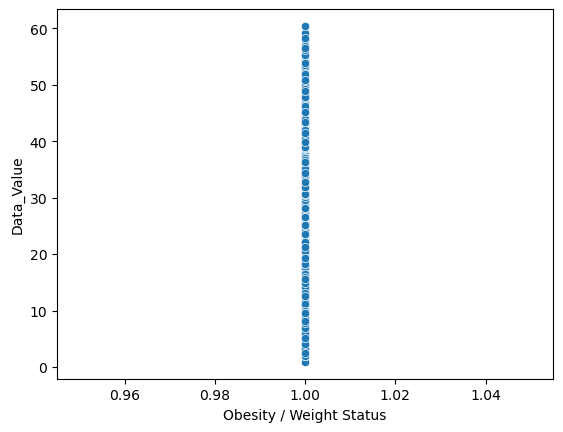

In [104]:
sns.scatterplot(x=xy['Obesity / Weight Status'],y=xy['Data_Value'])

In [105]:
# Splitting x and y
x=df.drop('Data_Value',axis=1)
y=df['Data_Value']

In [113]:
# Splitting the data to train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.3)

In [114]:
# Creating an linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [115]:
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
y_pred=lr.predict(x_test)

In [117]:
y_pred

array([30.74008742, 30.74008742, 30.74008742, ..., 31.87882847,
       31.87882847, 31.87882847])

In [124]:
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
r2_score(y_pred,y_test)

-357.07730016171297

In [126]:
mean_squared_error(y_pred,y_test)

103.16665376252942